# Homework 1. Measure the accuracy and speed of learning for the following algorithms
- `Epsilon Greedy, Epsilon Decreasing, UCB, Thompson Sampling, Policy Gradient`

- Note) Use Jupyter notebook (ipynb) file to submit your homework
#### 1. Define your performance metric indexes to measure accuracy and speed of learning with, mathematically.


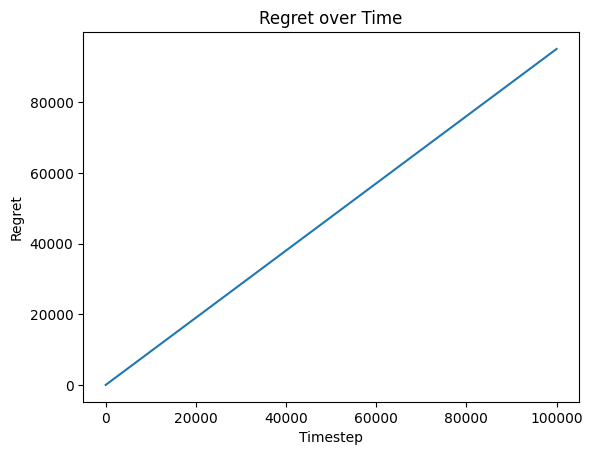

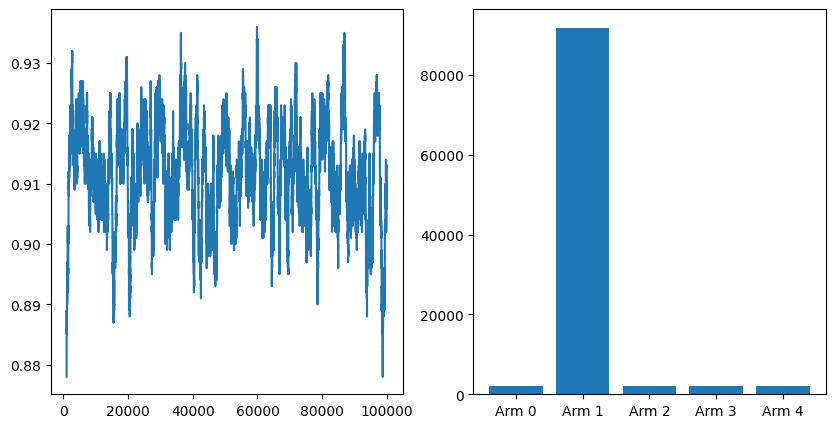

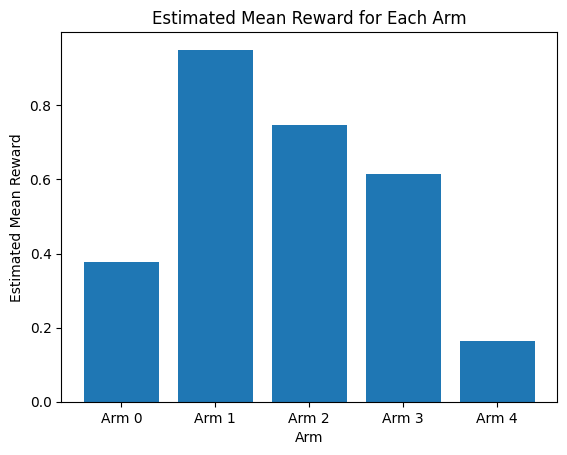

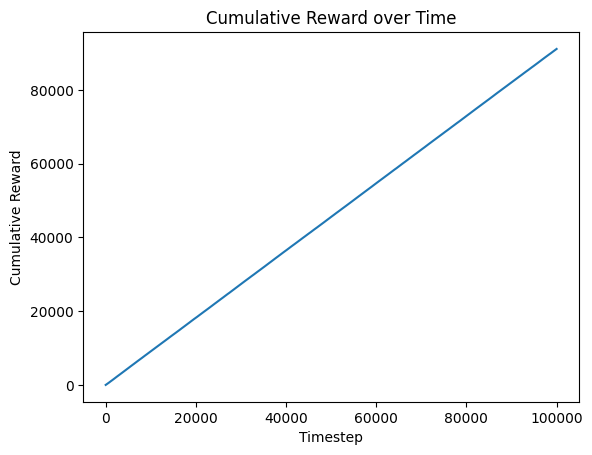

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class EpsilonGreedy:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.est_mean_rewards = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)
        self.total_reward = 0
        self.regrets = []
        self.rewards = []
        self.labels = ['Arm {}'.format(i) for i in range(num_arms)]
        
    def choose_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.num_arms)
        else:
            return np.argmax(self.est_mean_rewards)
        
    def update_estimates(self, arm, reward):
        self.counts[arm] += 1
        self.rewards.append(reward)
        self.total_reward += reward
        self.est_mean_rewards[arm] += (reward - self.est_mean_rewards[arm]) / self.counts[arm]
        
    def compute_regret(self, true_means, timestep):
        optimal_reward = np.max(true_means)
        expected_reward = np.sum(self.est_mean_rewards)
        regret = optimal_reward * timestep - expected_reward
        self.regrets.append(regret)
        
    def plot_regret(self):
        plt.plot(self.regrets)
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.title('Regret over Time')
        plt.show()
    
    def plot_rewards(self):
        fig, axes  = plt.subplots(1, 2, figsize=(10,5))
        axes[0].plot(pd.Series(self.rewards).rolling(1000).mean())
        axes[1].bar(self.labels, self.counts)
        plt.show()
    
    def plot_estimated_means(self):
        plt.bar(self.labels, self.est_mean_rewards)
        plt.xlabel('Arm')
        plt.ylabel('Estimated Mean Reward')
        plt.title('Estimated Mean Reward for Each Arm')
        plt.show()
    
    def plot_cumulative_reward(self):
        plt.plot(np.cumsum(self.rewards))
        plt.xlabel('Timestep')
        plt.ylabel('Cumulative Reward')
        plt.title('Cumulative Reward over Time')
        plt.show()
        

# Example usage
np.random.seed(42)
num_arms = 5
true_means = np.random.uniform(0, 1, num_arms)
epsilon = .1
trials = 100000


# Initialize Epsilon Greedy agent
agent = EpsilonGreedy(num_arms, epsilon)

# Run trials
for t in range(trials):
    chosen_arm = agent.choose_arm()
    reward = np.random.binomial(1, true_means[chosen_arm])
    agent.update_estimates(chosen_arm, reward)
    agent.compute_regret(true_means, t + 1)

# Plot regret over time
agent.plot_regret()
agent.plot_rewards()
agent.plot_estimated_means()
agent.plot_cumulative_reward()


#### 2. Measure accuracy and speed of learning with and show your numerical results using tables of graphs.



#### 3. Analyze and discuss the numerical results
